# Visualization (Part 4): Subplots

In this notebook, you will learn submplots, including:
 - plt.axes: Subplots by Hand
 - plt.subplot: Simple Grids of Subplots
 - plt.subplots: The Whole Grid in One Go
 - plt.GridSpec: More Complicated Arrangements
 
Python data Science textbook: https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## 1. ``plt.axes``: Subplots by Hand

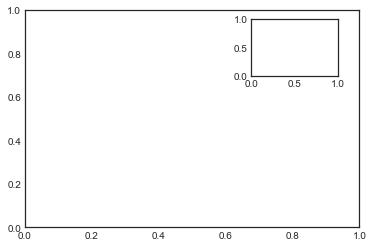

In [15]:
ax1 = plt.axes()  # standard axes # [left, bottom, width, height] = [0,0,1,1]
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2]) # [left, bottom, width, height]
#ax3 = plt.axes([-0.65, 0.65, 1.2, 0.2]) # [left, bottom, width, height]

The equivalent of this command within the object-oriented interface is ``fig.add_axes()``. Let's use this to create two vertically stacked axes:

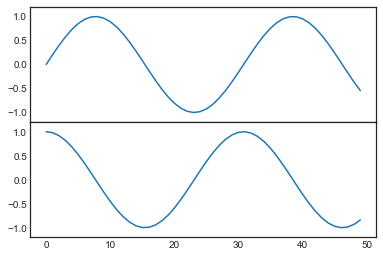

In [17]:
# object-oriented interface fig.add_axes()
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

## 2. ``plt.subplot``: Simple Grids of Subplots

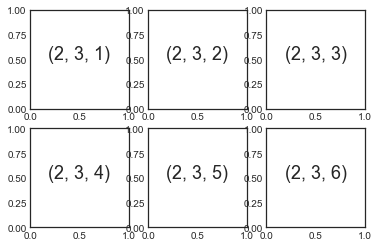

In [5]:
for i in range(1, 7):
    plt.subplot(2, 3, i) # (# of rows, # of columns, index (1,2,...,row*col) 
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

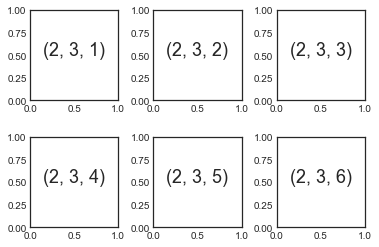

In [18]:
fig = plt.figure()

# ``plt.subplots_adjust`` can be used to adjust the spacing
# 0.4 means 40% of the subplot width and heigh
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

## 3. ``plt.subplots``: The Whole Grid in One Go

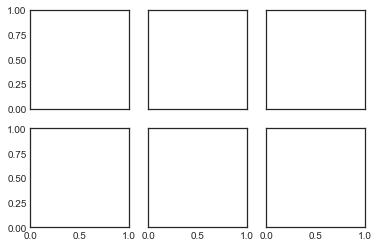

In [34]:
# (#rows, cols, sharex, sharey)
#fig, ax = plt.subplots(2, 3)
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)

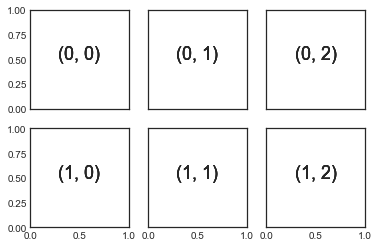

In [38]:
# axes are in a two-dimensional array, indexed by [row, col] (0-index based)
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
fig

## 4. ``plt.GridSpec``: More Complicated Arrangements

The ``plt.GridSpec()`` object does not create a plot by itself; it is simply a convenient interface that is recognized by the ``plt.subplot()`` command.

In [40]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

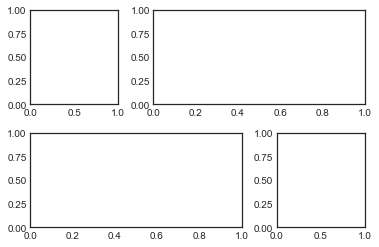

In [41]:
# specify subplot locations and extents using the familiary Python slicing syntax
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])  # equivalent to grid[0, 1:3]
plt.subplot(grid[1, :2])  # equivalent to grid[1, 0:2]
plt.subplot(grid[1, 2]);

This type of flexible grid alignment has a wide range of uses.
I most often use it when creating multi-axes histogram plots like the ones shown here:

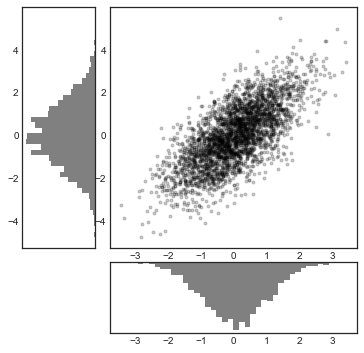

In [55]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

main_ax = fig.add_subplot(grid[:-1, 1:])                               # equivalent to grid[0:3, 1:4]
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax) # equivalent to grid[0:3, 0]
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax) # equivalent to grid[3, 1:4]

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
#y_hist.hist(y, 40, histtype='stepfilled', color='gray')
y_hist.invert_xaxis()